## **Sentiment Analysis using Natural Language Processing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


# Importing the libraries

In [5]:
!pip install scikit-plot


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [7]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [8]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [9]:
print("Shape of the DataFrame:",df.shape)
df.sample(5)

Shape of the DataFrame: (18000, 2)


,text,label
12925,i feel so ugly and ashamed img src http s,sadness
11037,i feel like a bitchy selfish idiot,anger
9471,i am feeling ok my incision is sore that is ex...,joy
13157,i was slicing a knife through a creamy cheesec...,joy
10539,im feeling a little impressed at their creativity,surprise


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_2.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('label')

<Axes: xlabel='count', ylabel='label'>

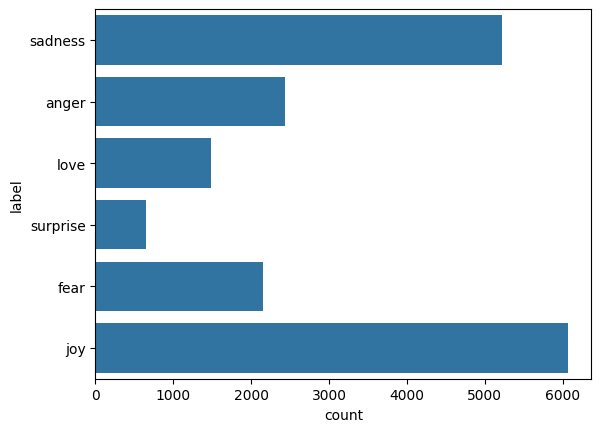

In [10]:
sns.countplot(df.label)

In [11]:
dist_labels={}
for num,key in enumerate(list(set(df.label))):
    dist_labels[key]=num
print(dist_labels)

{'fear': 0, 'sadness': 1, 'joy': 2, 'surprise': 3, 'love': 4, 'anger': 5}


In [12]:
df['label']=df['label'].map(dist_labels)
df.head()

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,5
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,5


## Data Pre-processing

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def clean_text(text):
#     corpus = []
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [lm.lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))]
#     corpus.append(' '.join(str(x) for x in text))
    return ' '.join(str(x) for x in text)

corpus = df['text'].apply(lambda x:clean_text(x))

## Word Cloud

In [18]:
corpus.head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

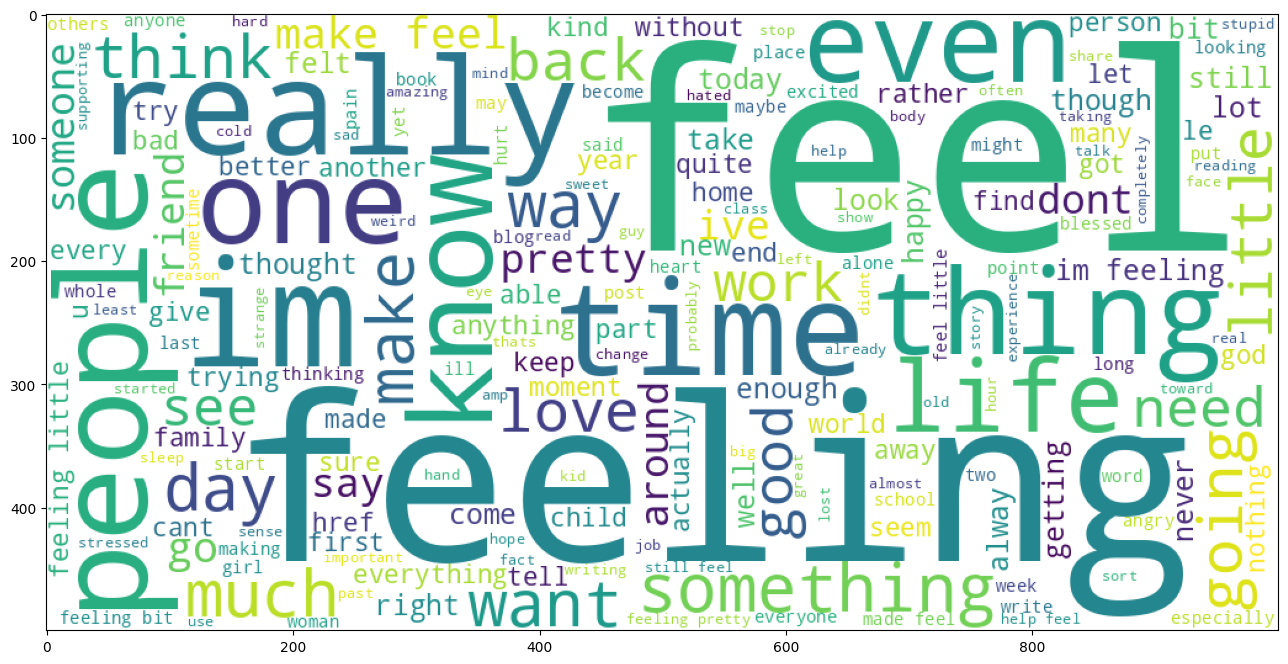

In [19]:
plt.figure(figsize=(20,8))
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

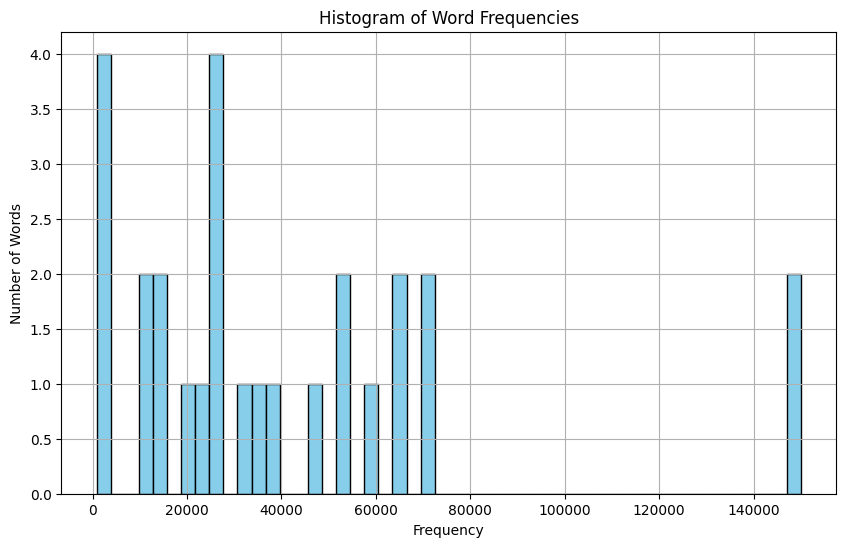

In [22]:
from collections import Counter

# Flatten the list of lists to a single list of words
all_words = [word for row in corpus for word in row]

# Calculate word frequencies
word_freq = Counter(all_words)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(word_freq.values(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.title('Histogram of Word Frequencies')
plt.grid(True)
plt.show()


## Bag of Words

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
x = tfidf_vect.fit_transform(corpus)
y = df.label

In [24]:
x

<18000x14295 sparse matrix of type '<class 'numpy.float64'>'
	with 162115 stored elements in Compressed Sparse Row format>

## GridSearchCV

In [25]:
# parameters = {'max_features': ('auto','sqrt'),
#              'n_estimators': [500, 1000, 1500],
#              'max_depth': [5, 10, None],
#              'min_samples_split': [5, 10, 15],
#              'min_samples_leaf': [1, 2, 5, 10],
#              'bootstrap': [True, False]}

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500],
             'max_depth': [5, None],}

In [27]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(x,y)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, None],
                         'max_features': ('auto', 'sqrt'),
                         'n_estimators': [500]},
             return_train_score=True)

## Check all combination of parameter resoponse

In [28]:
def print_result(results):
    print("best param are {}".format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean,std,param in zip(means,stds,results.cv_results_['params']):
        print("{} (+/-) {} for {}".format(round(mean,3),round(std,2),param))

In [29]:
print_result(grid_search)

best param are {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
0.338 (+/-) 0.0 for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.338 (+/-) 0.0 for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
0.885 (+/-) 0.01 for {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
0.885 (+/-) 0.01 for {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}


In [30]:
# Best parameters
grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

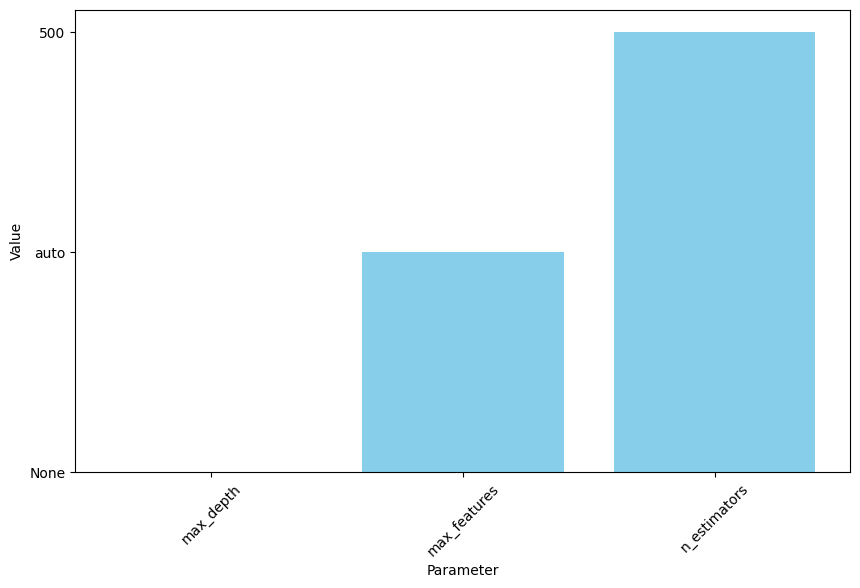

In [33]:
import matplotlib.pyplot as plt

# Assuming grid_search is your GridSearchCV object
best_params = grid_search.best_params_

# Handling None values by converting them to strings or providing default values
best_params = {k: str(v) if v is not None else "None" for k, v in best_params.items()}

# Plotting the best parameters
plt.figure(figsize=(10, 6))
plt.bar(best_params.keys(), best_params.values(), color='skyblue')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



In [31]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      )
rfc.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=500)

## Test Data Transformation

In [34]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels
test_df = y_test.map(dist_labels)
#pre-processing of text
test_corpus = X_test.apply(lambda x:clean_text(x))
#convert text data into vectors
testdata = tfidf_vect.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

## Model Evaluation

Accuracy_score:  0.886
Precision_score:  0.886
Recall_score:  0.886
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       224
           1       0.95      0.93      0.94       581
           2       0.89      0.92      0.91       695
           3       0.65      0.59      0.62        66
           4       0.77      0.69      0.72       159
           5       0.90      0.89      0.90       275

    accuracy                           0.89      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.88      0.89      0.88      2000



<Figure size 1500x1000 with 0 Axes>

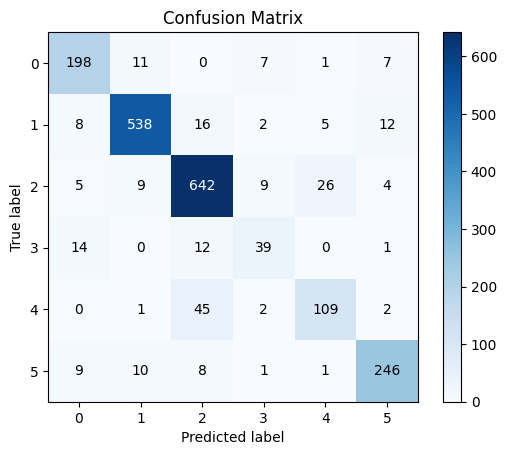

In [35]:
# rcParams['figure.figsize'] = 10,5
plt.figure(figsize=(15,10))
plot_confusion_matrix(test_df,predictions)
acc_score = accuracy_score(test_df,predictions)
pre_score = precision_score(test_df,predictions,average='micro')
rec_score = recall_score(test_df,predictions,average='micro')
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(test_df,predictions)
print(cr)

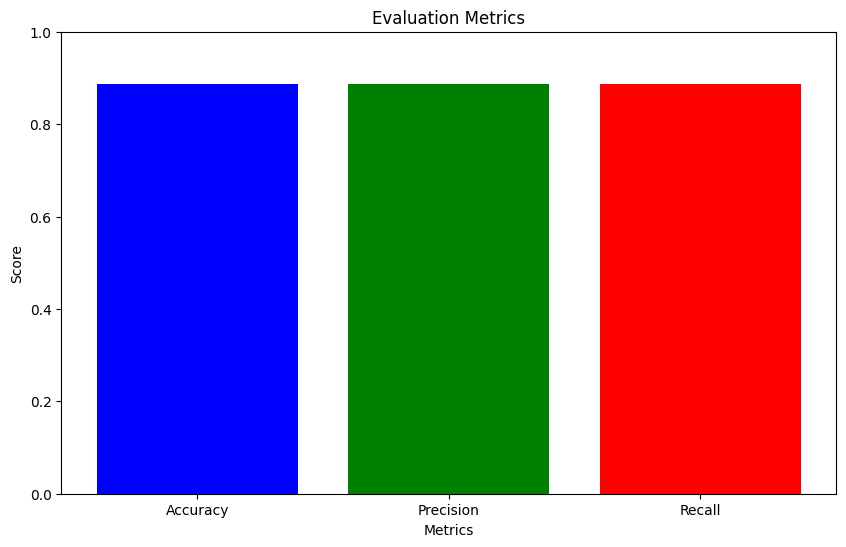

In [36]:
# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [acc_score, pre_score, rec_score]

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Setting y-axis limit to match score range (0 to 1)
plt.show()


In [42]:
import ipywidgets as widgets
from IPython.display import display

# Create text input widget
text_input = widgets.Text(
    value='',
    placeholder='Enter your text here...',
    description='Text:',
    disabled=False
)

# Create button widget
button = widgets.Button(description="Analyze Sentiment")

# Create output widget for displaying results
output = widgets.Output()

# Function to perform sentiment analysis
def analyze_sentiment(b):
    with output:
        output.clear_output()
        text = text_input.value

        # Pre-process the text
        cleaned_text = clean_text(text)

        # Convert text data into vectors
        text_vector = tfidf_vect.transform([cleaned_text])

        # Predict the sentiment
        prediction = rfc.predict(text_vector)

        # Map numerical prediction to emotion label
        emotion_labels = {v: k for k, v in dist_labels.items()}
        predicted_emotion = emotion_labels[prediction[0]]  # Get the emotion label for the predicted numerical value

        # Display the sentiment result
        print(f"Detected Emotion: {predicted_emotion.capitalize()}")

# Link button click event to sentiment analysis function
button.on_click(analyze_sentiment)

# Display widgets
display(text_input, button, output)


Text(value='', description='Text:', placeholder='Enter your text here...')

Button(description='Analyze Sentiment', style=ButtonStyle())

Output()